<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/Trista_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

# Imports and Normalization

In [1]:
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Using TensorFlow backend.


In [2]:
(Xtrain, ytrain), (Xtest, ytest) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [3]:
Xtrain.shape

(404, 13)

In [5]:
#was using sklearn.preprocessing normalize
Xtrain = keras.utils.normalize(Xtrain, axis=-1, order=2)
Xtest = keras.utils.normalize(Xtest, axis=-1, order=2)

import pandas as pd
pd.DataFrame(Xtrain).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816


In [6]:
print(ytrain.shape)
pd.DataFrame(ytrain).head()

(404,)


,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


# First NN

In [19]:
model = Sequential()

#input layer: input_dim is number of features
model.add(Dense(12, input_dim=13, activation='relu'))

#hidden layer 1
model.add(Dense(12, activation='relu'))

#output layer: 1 node and sigmoid
model.add(Dense(1, activation='sigmoid'))

#compiler: mean_squared_error because output is continuous regression
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_11 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=50, verbose=0, validation_split=0.33)

scores = model.evaluate(Xtest, ytest)
scores[1]

102/102 [==============================] - 0s 70us/step


571.1346399643842

In [25]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


In [26]:
history.history['mean_squared_error']

[519.7464690031828,
 519.3468248155382,
 518.9660142686632,
 518.6052171495226,
 518.2644707573785,
 517.9479641384548,
 517.6522996690538,
 517.373781105324,
 517.1152171947338,
 516.8762299714265,
 516.6491617838542,
 516.4429617422599,
 516.2532264992043,
 516.0796309859664,
 515.9207897044994,
 515.7733782732928,
 515.6387500904225,
 515.5125427246094,
 515.3974539297599,
 515.290594708478,
 515.1917634186922,
 515.1009652596933,
 515.0172709147135,
 514.9398220486111,
 514.8681170428241,
 514.8022214536313,
 514.7407371238426,
 514.6836733217592,
 514.6305650499132,
 514.5810442889178,
 514.5347728587963,
 514.4920685944734,
 514.4522989908854,
 514.4149814181858,
 514.3802987557871,
 514.3482295283565,
 514.317857530382,
 514.289405879268,
 514.2628180609809,
 514.238165057147,
 514.2150738751446,
 514.1931211118344,
 514.1724417227285,
 514.1528948748553,
 514.1341588903357,
 514.1165724012587,
 514.0997095178675,
 514.0837499547888,
 514.0686116536458,
 514.0542681658709]

In [27]:
history.history['val_mean_squared_error']

[606.5269852823286,
 606.1115299054046,
 605.7191112005888,
 605.349329250962,
 605.0032945319788,
 604.6781475010202,
 604.3743627747493,
 604.0922578270755,
 603.8289990780959,
 603.5829326572702,
 603.3555994745511,
 603.145458619986,
 602.9534023911206,
 602.7778953438375,
 602.6164732975747,
 602.4677310772796,
 602.3302689737349,
 602.2030006522563,
 602.0861620547166,
 601.9785989789821,
 601.8791517570837,
 601.7878786912605,
 601.7034534055796,
 601.6255652584247,
 601.5536703992245,
 601.4869293668377,
 601.4249080828766,
 601.3670695290637,
 601.3134597095091,
 601.2634318337512,
 601.2170305394415,
 601.173476034136,
 601.1330680277811,
 601.0955095433477,
 601.060609276615,
 601.0278315757638,
 600.9969906024079,
 600.9682056939424,
 600.9414754839086,
 600.91644332658,
 600.8929220171117,
 600.8704884087862,
 600.8492700377507,
 600.829258705253,
 600.8102130035855,
 600.7921356656658,
 600.7748490518599,
 600.7585267024253,
 600.7431713502798,
 600.7284222503207]

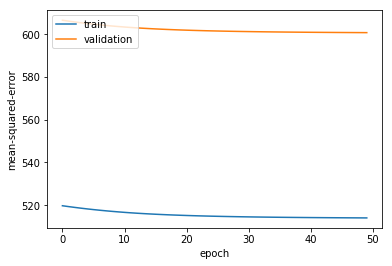

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('mean-squared-error')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#oh oof
#train and val are stuck and not near another

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

scores = cross_validate(LinearRegression(), Xtrain, ytrain,
                       scoring='neg_mean_squared_error', cv=5)

scores['test_score'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


-24.689153269941254

In [34]:
pd.DataFrame(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_score,train_score
0,0.032656,0.000631,-29.342719,-21.354353
1,0.001253,0.000351,-20.326994,-23.766188
2,0.000665,0.000320,-16.089846,-24.734954
3,0.000634,0.000277,-33.807328,-20.231042
4,0.000675,0.000252,-23.878879,-22.743887


In [37]:
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(Xtrain, ytrain)
ypred = linear.predict(Xtest)
mean_squared_error(ytest, ypred)

18.165510493496445

# NN with feature engineering

In [38]:
from sklearn.preprocessing import PolynomialFeatures

newfeatures = PolynomialFeatures(2) #multiply every two features
Xtrain = newfeatures.fit_transform(Xtrain)
Xtest = newfeatures.fit_transform(Xtest)

Xtrain.shape

(404, 105)

In [39]:
model = Sequential()

#input layer: input_dim is number of features
model.add(Dense(12, input_dim=105, activation='relu'))

#hidden layer 1
model.add(Dense(12, activation='relu'))

#output layer: 1 node and sigmoid
model.add(Dense(1, activation='sigmoid'))

#compiler: mean_squared_error because output is continuous regression
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                1272      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=50, verbose=0, validation_split=0.33)

scores = model.evaluate(Xtest, ytest)
scores[1]

102/102 [==============================] - 0s 65us/step


572.0893470913757

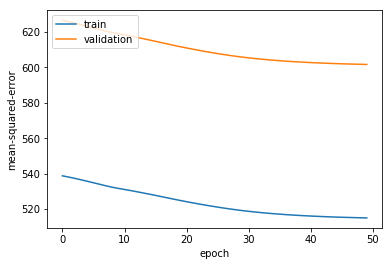

In [41]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('mean-squared-error')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
#trying more epochs
#doesn't accomplish much
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=500, verbose=0, validation_split=0.33)

scores = model.evaluate(Xtest, ytest)
scores[1]

102/102 [==============================] - 0s 59us/step


570.7043600643383

In [44]:
#on the other hand linear improved a lot
linear.fit(Xtrain, ytrain)
ypred = linear.predict(Xtest)
mean_squared_error(ytest, ypred)

13.6442076439951

# Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.